### Intro
The data used in this notebook is tidal current velocity at 83 observation points. The data is obtained from numerical simulation.
In this notebook, we will look for the correlation value between two simulation data which is labeled as `model` and `TMD`.

The correlation that is looking for is the current velocity component of longitude (u) and component of latitude (v).

Data columns tells about points of observation location, nad rows tells about time of observation

### Import Library

In [1]:
import numpy as np 
import pandas as pd 
from scipy.stats import pearsonr, t

import matplotlib.pyplot as plt
%matplotlib inline

### Loading Data

In [2]:
##Import Data
data = pd.read_csv('tm_feb_dav.csv', dtype=np.float32)
print(data.info())
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Columns: 414 entries, TMD4 u to model1 v
dtypes: float32(414)
memory usage: 1.1 MB
None


,TMD4 u,model4 u,TMD4 v,model4 v,Unnamed: 4,TMD5 u,model5 u,TMD5 v,model5 v,Unnamed: 9,...,Unnamed: 404,TMD3 u,model3 u,TMD3 v,model 3 v,Unnamed: 409,TMD1 u,model1 u,TMD1 v,model1 v
0,-0.033949,0.008890,0.043272,0.003583,NaN,-0.035917,0.002642,0.042911,0.000956,NaN,...,NaN,-0.039307,-0.001632,0.016523,0.006037,NaN,-0.026728,-0.038882,-0.033973,0.020813
1,-0.085583,0.016198,0.053401,-0.006475,NaN,-0.092629,0.000896,0.052818,-0.007124,NaN,...,NaN,-0.081314,-0.007352,0.020965,0.014547,NaN,-0.051177,-0.062650,-0.047885,0.016716
2,-0.133249,0.026233,0.054004,-0.020419,NaN,-0.145094,0.004279,0.053169,-0.018638,NaN,...,NaN,-0.118272,-0.006343,0.021514,0.013137,NaN,-0.071283,-0.079969,-0.057440,0.024797
3,-0.166493,0.038576,0.044450,-0.036267,NaN,-0.181795,0.009064,0.043376,-0.031489,NaN,...,NaN,-0.142209,-0.004868,0.017776,0.019049,NaN,-0.082556,-0.099233,-0.060857,0.004678
4,-0.176879,0.053217,0.026308,-0.053818,NaN,-0.193429,0.017644,0.025065,-0.045556,NaN,...,NaN,-0.147040,-0.001094,0.010285,0.022728,NaN,-0.081964,-0.105485,-0.057250,0.011037


As you can see from table above, our data has columns which is consisting NaN values. 

Besides that, our columns not in the right order (initiate with `TMD4 u` and `model4 u` pair, but ends with `TMD1 u` and `model1 u` pair. So we should sort it, to make analysis easier.

In [3]:
# drop nan values
data.dropna(axis=1, inplace=True)
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Columns: 332 entries, TMD4 u to model1 v
dtypes: float32(332)
memory usage: 870.3 KB
None


,TMD4 u,model4 u,TMD4 v,model4 v,TMD5 u,model5 u,TMD5 v,model5 v,TMD6 u,model6 u,...,TMD2 v,model2 v,TMD3 u,model3 u,TMD3 v,model 3 v,TMD1 u,model1 u,TMD1 v,model1 v
0,-0.033949,0.008890,0.043272,0.003583,-0.035917,0.002642,0.042911,0.000956,-0.038912,-0.002451,...,-0.005638,-0.022782,-0.039307,-0.001632,0.016523,0.006037,-0.026728,-0.038882,-0.033973,0.020813
1,-0.085583,0.016198,0.053401,-0.006475,-0.092629,0.000896,0.052818,-0.007124,-0.103283,-0.013028,...,-0.007481,-0.007129,-0.081314,-0.007352,0.020965,0.014547,-0.051177,-0.062650,-0.047885,0.016716
2,-0.133249,0.026233,0.054004,-0.020419,-0.145094,0.004279,0.053169,-0.018638,-0.162984,-0.015041,...,-0.009099,0.013786,-0.118272,-0.006343,0.021514,0.013137,-0.071283,-0.079969,-0.057440,0.024797
3,-0.166493,0.038576,0.044450,-0.036267,-0.181795,0.009064,0.043376,-0.031489,-0.204893,-0.018883,...,-0.010341,0.009851,-0.142209,-0.004868,0.017776,0.019049,-0.082556,-0.099233,-0.060857,0.004678
4,-0.176879,0.053217,0.026308,-0.053818,-0.193429,0.017644,0.025065,-0.045556,-0.218403,-0.017212,...,-0.011016,0.035253,-0.147040,-0.001094,0.010285,0.022728,-0.081964,-0.105485,-0.057250,0.011037


### Compute correlation coefficient for u and v component

In [4]:
# compute correlation for u component
col = 0
list_corr_u = []
for i in range(int(len(data.columns)/4)):
  data_corr = np.array(pearsonr(data.iloc[:,col], data.iloc[:,col+1]))
  list_corr_u.append([data_corr[0]])
  col+=4

corr_u = pd.DataFrame(list_corr_u, columns=['corr u'])
corr_u.shape

(83, 1)

In [5]:
corr_u.head()

,corr u
0,0.081990
1,0.193388
2,0.320182
3,0.551764
4,0.634859


In [6]:
# Compute correlation for v component
col = 2
list_corr_v = []
for i in range(int(len(data.columns)/4)):
  data_corr = np.array(pearsonr(data.iloc[:,col], data.iloc[:,col+1]))
  list_corr_v.append([data_corr[0]])
  col+=4

corr_v = pd.DataFrame(list_corr_v, columns=['corr v'])
corr_v.shape

(83, 1)

In [7]:
corr_v.head()

,corr v
0,0.044084
1,0.029696
2,0.005688
3,-0.044656
4,-0.052467


In [8]:
# Generate index based on columns label
index1 = np.array([2,3,1])
index2 = np.arange(4,84,1)
index_all = np.append(index2, index1, axis=0)
index_all

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,  2,  3,  1])

In [9]:
# setting index
corr_all = pd.concat([corr_u, corr_v], axis=1).set_index(index_all, 'Point')
corr_all

,corr u,corr v
4,0.081990,0.044084
5,0.193388,0.029696
6,0.320182,0.005688
7,0.551764,-0.044656
8,0.634859,-0.052467
...,...,...
82,0.037915,-0.827277
83,0.099425,-0.735817
2,0.132731,-0.529287
3,0.209474,0.377707


In [10]:
# Sorting index
corr_all.sort_index(ascending=True, inplace=True)
corr_all

,corr u,corr v
1,0.050074,-0.783470
2,0.132731,-0.529287
3,0.209474,0.377707
4,0.081990,0.044084
5,0.193388,0.029696
...,...,...
79,0.018023,-0.725230
80,0.071866,-0.678154
81,0.077458,-0.747292
82,0.037915,-0.827277


### t-test
#### t table

In [11]:
n = len(data) # number of sample data
alpha = 0.05 # one tailed test
df = n - 2 # degree of freedom
corr_all['t table'] = t.ppf(1 - alpha, df)
print('(sampel, alpha)',n,',',alpha)
corr_all

(sampel, alpha) 671 , 0.05


,corr u,corr v,t table
1,0.050074,-0.783470,1.647134
2,0.132731,-0.529287,1.647134
3,0.209474,0.377707,1.647134
4,0.081990,0.044084,1.647134
5,0.193388,0.029696,1.647134
...,...,...,...
79,0.018023,-0.725230,1.647134
80,0.071866,-0.678154,1.647134
81,0.077458,-0.747292,1.647134
82,0.037915,-0.827277,1.647134


#### t compute
We calculate t-compute, using this equation,
\begin{equation*}
t_{compute} = \frac{corr \sqrt{n-2}}{\sqrt{1 - corr^2}}
\end{equation*}
where, n is number of observation

In [12]:
corr_all['t compute u'] = (corr_all['corr u']*np.sqrt(n-2)) / (np.sqrt(1 - corr_all['corr u']**2))
corr_all['t compute v'] = (corr_all['corr v']*np.sqrt(n-2)) / (np.sqrt(1 - corr_all['corr v']**2))
corr_all

,corr u,corr v,t table,t compute u,t compute v
1,0.050074,-0.783470,1.647134,1.296794,-32.609399
2,0.132731,-0.529287,1.647134,3.463738,-16.135490
3,0.209474,0.377707,1.647134,5.540996,10.550951
4,0.081990,0.044084,1.647134,2.127837,1.141354
5,0.193388,0.029696,1.647134,5.098231,0.768438
...,...,...,...,...,...
79,0.018023,-0.725230,1.647134,0.466234,-27.244610
80,0.071866,-0.678154,1.647134,1.863629,-23.867188
81,0.077458,-0.747292,1.647134,2.009480,-29.087782
82,0.037915,-0.827277,1.647134,0.981377,-38.087823


In [13]:
# Find point which has significant correlation u and v
corr_all_sig = corr_all.copy()
corr_all_sig = corr_all_sig[(corr_all_sig['t compute u'] > corr_all_sig['t table']) & 
                                       (corr_all_sig['t compute v'] > corr_all_sig['t table'])]

print('+++')
print('From',len(data.columns)/4 , 'There are',len(corr_all_sig),'point which has significant correlation u and v, with confidence level 95%')
print('+++\n')                                  

+++
From 83.0 There are 34 point which has significant correlation u and v, with confidence level 95%
+++



In [14]:
corr_all_sig.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 3 to 68
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   corr u       34 non-null     float64
 1   corr v       34 non-null     float64
 2   t table      34 non-null     float64
 3   t compute u  34 non-null     float64
 4   t compute v  34 non-null     float64
dtypes: float64(5)
memory usage: 1.6 KB


In [15]:
print('Point which has significant correlation u and v, with confidence level 95%\n')
corr_all_sig

Point which has significant correlation u and v, with confidence level 95%



,corr u,corr v,t table,t compute u,t compute v
3,0.209474,0.377707,1.647134,5.540996,10.550951
16,0.349019,0.064613,1.647134,9.633176,1.674728
17,0.066660,0.098060,1.647134,1.728018,2.548618
18,0.182986,0.072607,1.647134,4.814238,1.882964
33,0.149365,0.138535,1.647134,3.907159,3.618096
34,0.291387,0.109500,1.647134,7.878613,2.849354
35,0.445467,0.084668,1.647134,12.869465,2.197833
36,0.609639,0.074553,1.647134,19.892433,1.933699
38,0.066163,0.253248,1.647134,1.715063,6.771004
39,0.099627,0.236303,1.647134,2.589748,6.290120


(0, 1)

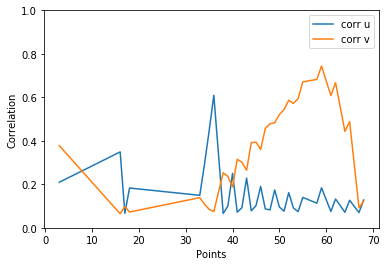

In [16]:
corr_all_sig.drop(['t table', 't compute u', 't compute v'], axis=1).plot()
plt.xlabel('Points')
plt.ylabel('Correlation')
plt.ylim(0,1)

In [18]:
# Save file
corr_all_sig.to_csv('corr_signifikan.csv')